In [1]:
import platform
import os
import numpy as np
import tensorflow as tf
gpu_token = tf.test.is_gpu_available('GPU')

if platform.machine() == 'x86_64':
    if gpu_token:
        os.chdir('/home/ucdasec/Faulthunter-RNN-approach')
    else:
        os.chdir("/home/sakshmeno/Documents/GitHub/C-RNN-approach")
elif platform.machine() == 'arm64':
    os.chdir("/Users/saksh.menon/Documents/GitHub/C-RNN-approach")

from Utils.dataframe_gen import *
from Utils.vector_gen import *
from Utils.w2b_encoding_lw import *


2024-04-10 22:50:06.981986: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-10 22:50:06.982015: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-10 22:50:06.982969: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-10 22:50:06.988158: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-10 22:50:07.643390: W tensorflow/compiler/tf2

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2024-04-10 22:50:08.274768: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-10 22:50:08.310078: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-10 22:50:08.310280: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

ModuleNotFoundError: No module named 'Utils.w2b_encoding_lw'

In [ ]:
original_df = dataframe_init(gpu_token)[0]
vectors = vec_split(original_df)
vectors = encoder(vectors)
tensor_gen = tensor_gen(vectors)

2024-03-21 09:38:05.471754: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-21 09:38:05.471981: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-21 09:38:05.472140: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [3]:
model = model_ver_0(vectors[0]['Encoded Lines'][0].shape[0])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 218, 1024)         1050624   
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 218, 1024)         2098176   
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 1024)              2098176   
                                                                 
 dense (Dense)               (None, 1024)              1049600   
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_3 (Dense)             (None, 2)                 2

In [4]:
history = model.fit(tensors[0], tensors[3], epochs=150, validation_data=(tensors[1],tensors[4]))
y_pred = model.predict(tensors[2])

Epoch 1/150
92/92 [==============================] - 114s 1s/step - loss: 24.7164 - accuracy: 0.9762 - val_loss: 19.1032 - val_accuracy: 0.9762
Epoch 2/150
92/92 [==============================] - 112s 1s/step - loss: 14.9906 - accuracy: 0.9769 - val_loss: 11.3975 - val_accuracy: 0.9762
Epoch 3/150
92/92 [==============================] - 112s 1s/step - loss: 8.8484 - accuracy: 0.9769 - val_loss: 6.6360 - val_accuracy: 0.9762
Epoch 4/150
92/92 [==============================] - 111s 1s/step - loss: 5.0914 - accuracy: 0.9769 - val_loss: 3.7656 - val_accuracy: 0.9762
Epoch 5/150
92/92 [==============================] - 112s 1s/step - loss: 2.8639 - accuracy: 0.9769 - val_loss: 2.0980 - val_accuracy: 0.9762
Epoch 6/150
92/92 [==============================] - 112s 1s/step - loss: 1.5918 - accuracy: 0.9769 - val_loss: 1.1638 - val_accuracy: 0.9762
Epoch 7/150
92/92 [==============================] - 112s 1s/step - loss: 0.8870 - accuracy: 0.9769 - val_loss: 0.6602 - val_accuracy: 0.9762
Ep

In [18]:
y_pred = model.predict(tensors[2])

33/33 [==============================] - 24s 738ms/step


In [5]:
classify = lambda x : int(x[0]<x[1])
classified_outputs = list(map(classify, y_pred))
classified_labels = list(map(classify, tensors[3]))

In [6]:
score_summary(classified_labels, classified_outputs, 0)
true_positives, true_negetives, false_positives, false_negetives = true_false_computation(classified_labels, classified_outputs, 0)
print('true_positives: {}\ntrue_negetives: {}\nfalse_positives: {}\nfalse_negetives: {}\n'.format(true_positives, true_negetives, false_positives, false_negetives))
print('#########################################\n')
score_summary(classified_labels, classified_outputs, 1)
true_positives, true_negetives, false_positives, false_negetives = true_false_computation(classified_labels, classified_outputs, 1)
print('true_positives: {}\ntrue_negetives: {}\nfalse_positives: {}\nfalse_negetives: {}\n'.format(true_positives, true_negetives, false_positives, false_negetives))


For secure:
f1 score:  0.9879807692307693
precision score:  0.9762470308788599
recall score:  0

true_positives: 822
true_negetives: 0
false_positives: 20
false_negetives: 0

#########################################

For insecure:
f1 score:  0.0
precision score:  0
recall score:  0.0

true_positives: 0
true_negetives: 822
false_positives: 0
false_negetives: 20



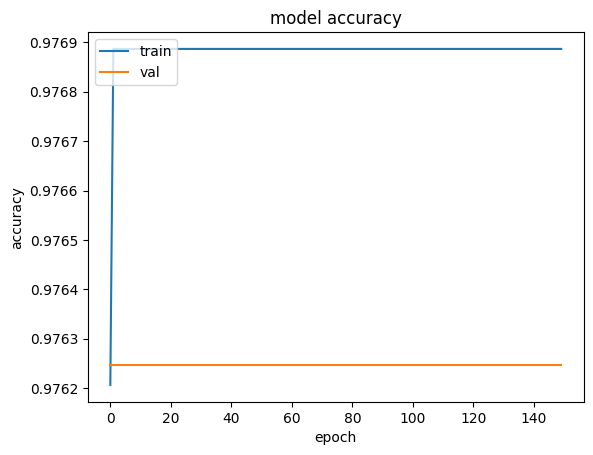

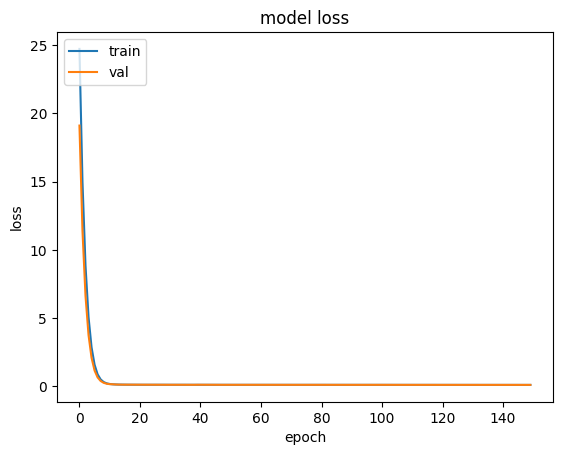

In [8]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [39]:
!nvidia-smi

Wed Mar 20 12:57:30 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.147.05   Driver Version: 525.147.05   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:02:00.0 Off |                  N/A |
| 28%   30C    P8     5W / 151W |   7694MiB /  8192MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
!git pull

Updating f89c940..45f66d6
Fast-forward
 .vscode/launch.json                                |     16 +
 .../RNN_paper_prototype.cpython-310.pyc            |    Bin 2408 -> 2306 bytes
 Scripts/tester.ipynb                               | 250429 +-----------------
 Scripts/vec_playground.ipynb                       |    293 +-
 Utils/__pycache__/dataframe_gen.cpython-310.pyc    |    Bin 5447 -> 5505 bytes
 Utils/__pycache__/metrics_summary.cpython-310.pyc  |    Bin 0 -> 1373 bytes
 Utils/__pycache__/vector_gen.cpython-310.pyc       |    Bin 3093 -> 3517 bytes
 Utils/__pycache__/word2vec_gen.cpython-310.pyc     |    Bin 2604 -> 2604 bytes
 Utils/__pycache__/word2vec_ver2.cpython-310.pyc    |    Bin 0 -> 1566 bytes
 Utils/dataframe_gen.py                             |      9 +-
 Utils/vector_gen.py                                |     16 +-
 11 files changed, 708 insertions(+), 250055 deletions(-)
 create mode 100644 .vscode/launch.json
 create mode 100644 Utils/__pycache__/metrics_summary.